In [4]:
! git clone https://github.com/materialsgenomefoundation/kawin

%cd kawin

! pip install -e .

Cloning into 'kawin'...
remote: Enumerating objects: 1968, done.
remote: Counting objects: 100% (293/293), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 1968 (delta 233), reused 211 (delta 205), pack-reused 1675 (from 1)
Receiving objects: 100% (1968/1968), 159.05 MiB | 22.53 MiB/s, done.
Resolving deltas: 100% (1267/1267), done.
/content/kawin/kawin/kawin
Obtaining file:///content/kawin/kawin/kawin
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for kawin (pyproject.toml) ... done
  Created wheel for kawin: filename=kawin-0.3.1-0.editable-py3-none-any.whl size=4444 sha256=22842a653a63568ab5c3bff5d9cfb76280897b02a73132081b05b62f0e1c82b2
  Stored in directory: /tmp/pip-ephem-wheel-cache-xpv3okpy/wheels/36/4f/4a/475a8062f6936de961756d2b5d790323ff301627aa03686c8b
Successfully built kawin
 

In [5]:
from kawin.thermo import MulticomponentThermodynamics

phases = ['DELTA', 'GAMMA_DP', 'GAMMA_PRIME', 'LAVES']
therm = MulticomponentThermodynamics('/content/IN718_TDB.TDB', ['NI', 'FE', 'CR', 'MO', 'NB', 'AL', 'TI'], phases)

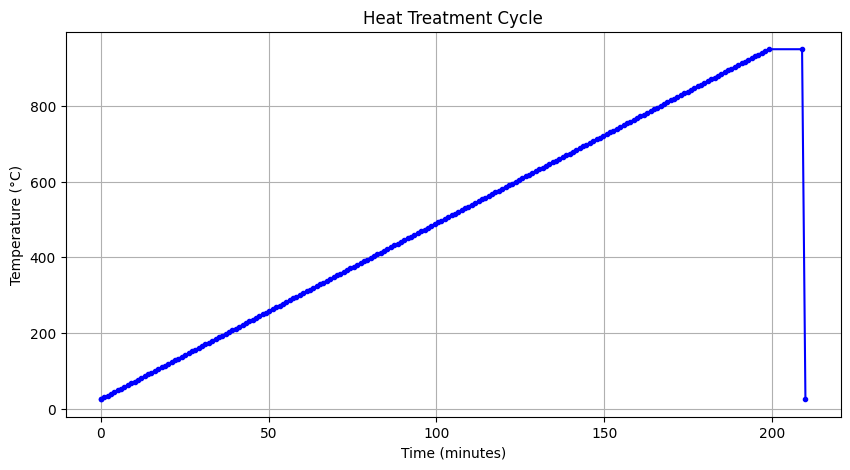

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from kawin.precipitation.PrecipitationParameters import TemperatureParameters
import numpy as np
import matplotlib.pyplot as plt


def heat_treatment_cycle():
    time = [0]  # Time in minutes
    temp = [25]  # Temperature in °C21

    # Heating from 25 to 950°C
    heat_time = np.linspace(0, 199, 199)  # Assume it takes 60 min
    heat_temp = np.linspace(25, 950, 199)

    time.extend(heat_time)
    temp.extend(heat_temp)

    # Holding at 950°C for 10 min
    time.append(time[-1] + 10)
    temp.append(950)

    # Water quenching (instantaneous cooling to 25°C)
    time.append(time[-1] + 1)
    temp.append(25)



    # Plotting the graph
    plt.figure(figsize=(10, 5))
    plt.plot(time, temp, marker='o', linestyle='-', color='b', markersize=3)
    plt.xlabel('Time (minutes)')
    plt.ylabel('Temperature (°C)')
    plt.title('Heat Treatment Cycle')
    plt.grid(True)
    plt.show()

heat_treatment_cycle()



In [ ]:
from kawin.precipitation import MatrixParameters, PrecipitateParameters

# Define the Matrix (Austenitic FCC phase) with major alloying elements
matrix = MatrixParameters(['NI', 'FE', 'CR', 'MO', 'NB', 'TI', 'AL'])
matrix.initComposition = [0.52, 0.185, 0.187, 0.033, 0.0545, 0.0103, 0.006]  # Example weight fractions
matrix.volume.setVolume(1e-5, 'VM', 4)  # Setting the matrix volume

# Define Interfacial Energy (gamma) for Different Precipitates
gamma = {
    'GAMMA_PRIME': 0.05,  # γ' (Ni3(Al,Ti))
    'GAMMA_DP': 0.05,  # γ'' (Ni3Nb)
    'DELTA': 0.18,  # δ (Ni3Nb)
    'LAVES': 0.20  # Laves phase (Nb and Mo rich)
    }


# Define the list of precipitate phases
phases = ['MATRIX', 'GAMMA_PRIME', 'GAMMA_DP', 'DELTA', 'LAVES']

# Define Precipitate Parameters for Each Phase
precipitates = []

for p in phases[1:]:  # Skip the 'MATRIX' phase
    params = PrecipitateParameters(p)
    params.gamma = gamma[p]  # Assign interfacial energy from the gamma dictionary
    params.volume.setVolume(1e-5, 'VM', 4)  # Set the precipitate volume (same as the matrix)
    precipitates.append(params)  # Store the precipitate parameters

# Print confirmation
print("Precipitate parameters defined for Inconel 718.")


Precipitate parameters defined for Inconel 718.


In [ ]:
from kawin.precipitation import PrecipitateModel
from kawin.solver import SolverType
import numpy as np

In [ ]:
# Define the matrix parameters for Inconel 718 (Ni-Fe-Cr base alloy)
matrix = MatrixParameters(['NI', 'FE', 'CR', 'NB', 'MO', 'TI', 'AL'])
matrix.initComposition = [0.527, 0.19, 0.175, 0.052, 0.03, 0.009, 0.007]  # Atomic fractions for Inconel 718
matrix.volume.setVolume(1e-5, 'VM', 4)

# Define interfacial energy values (γ) for the precipitate phases in Inconel 718
gamma = {
    'GAMMA_PRIME': 0.2,  # γ' (Ni3(Al,Ti))
    'GAMMA_DP': 0.18,  # γ'' (Ni3Nb)
    'DELTA': 0.15,  # δ phase (Ni3Nb)
    'LAVES': 0.12  # Laves phase (Nb-rich intermetallic)
}

# List of precipitate phases in Inconel 718
phases = ['MATRIX', 'GAMMA_PRIME', 'GAMMA_DP', 'DELTA', 'LAVES']

# Define precipitate parameters for Inconel 718
precipitates = []
for p in phases[1:]:  # Exclude the matrix phase
    params = PrecipitateParameters(p)
    params.gamma = gamma[p]
    params.volume.setVolume(1e-5, 'VM', 4)
    precipitates.append(params)

In [ ]:

# Create custom time-temperature profile
time_points = []  # Time in seconds
temperature_points = []  # Temperature in Celsius
# Heating phase from 25°C to 1020°C in 199 minutes (11,940 seconds)
heating_time = np.linspace(0, 11940, 199)  # 199 minutes = 11,940 seconds
heating_temp = np.linspace(25, 950, 199)

time_points.extend(heating_time)
temperature_points.extend(heating_temp)
# Holding phase at 1020°C for 1 hour
time_points.extend([heating_time[-1] + i for i in range(10)])  # 10 min holding time
temperature_points.extend([950] * 50)
# Water quenching phase (instantaneous cooling to 25°C)
time_points.append(time_points[-1] + 1)  # Add a very short time for quenching
temperature_points.append(25)
# Now we can create the temperature profile manually
# Define the temperature profile as a dictionary
temperature = {'time': time_points, 'temperature': temperature_points}



In [ ]:
%cd /content/kawin/kawin/solver

/content/kawin/kawin/solver


In [ ]:
from pycalphad import Database
tdb = Database("/content/NIST-NiMob13.TDB")


In [ ]:
from kawin.precipitation import PrecipitateModel
from kawin.solver import SolverType
import numpy as np
from kawin.precipitation.PrecipitationParameters import TemperatureParameters

%cd /content/kawin/kawin/solver

def heat_treatment_cycle():
    time = [0]  # Time in minutes
    temp = [25]  # Temperature in °C

    # Heating from 25 to 950°C
    heat_time = np.linspace(0, 199, 199)  # Assume it takes 60 min
    heat_temp = np.linspace(25, 950, 199)

    time.extend(heat_time)
    temp.extend(heat_temp)

    # Holding at 950°C for 10 min
    time.append(time[-1] + 10)
    temp.append(950)

    # Water quenching (instantaneous cooling to 25°C)
    time.append(time[-1] + 1)
    temp.append(25)

# Define a function to get temperature at a given time
def get_temperature(time):
    """Interpolates temperature based on the defined time-temperature profile."""
    # Find the closest time point in the profile
    index = np.searchsorted(temperature['time'], time, side='right')
    # Handle edge cases
    if index == 0:
        return temperature['temperature'][0]
    if index == len(temperature['time']):
        return temperature['temperature'][-1]
    # Linear interpolation
    t1, t2 = temperature['time'][index - 1], temperature['time'][index]
    temp1, temp2 = temperature['temperature'][index - 1], temperature['temperature'][index]
    return temp1 + (temp2 - temp1) * (time - t1) / (t2 - t1)



# Create the precipitation model for Inconel 718
model = PrecipitateModel(
    thermodynamics=therm,
    matrixParameters=matrix,
    precipitateParameters=precipitates,
    temperatureParameters=get_temperature # Pass the temperature function here
)
# Solve the precipitation model for Inconel 718 over a 25-hour period using Explicit Euler solver
model.solve(25*3600, solverType=SolverType.EXPLICITEULER, verbose=True, vIt=10000)

/content/kawin/kawin/solver


IndexError: list index out of range

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

model.plot(axes[0,0], 'Total Precipitate Density', timeUnits='h', label='Total', color='k', linestyle=(0,(5,5)), zorder=6)
model.plot(axes[0,0], 'Precipitate Density', timeUnits='h', alpha=0.75)
axes[0,0].set_ylim([1e5, 1e25])
axes[0,0].set_xscale('linear')
axes[0,0].set_yscale('log')

model.plot(axes[0,1], 'Total Volume Fraction', timeUnits='h', label='Total', color='k', linestyle=(0,(5,5)), zorder=6)
model.plot(axes[0,1], 'Volume Fraction', timeUnits='h', alpha=0.75)
axes[0,1].set_xscale('linear')

model.plot(axes[1,0], 'Average Radius', timeUnits='h')
axes[1,0].set_xscale('linear')

model.plot(axes[1,1], 'Composition', timeUnits='h')
axes[1,1].set_xscale('linear')

fig.tight_layout()

In [ ]:
# Create the precipitation model for Inconel 718
model = PrecipitateModel(
    thermodynamics=therm,  # Thermodynamic data for Inconel 718 (must be defined separately)
    matrixParameters=matrix,
    precipitateParameters=precipitates,
    temperatureParameters=temperature
)

# Solve the precipitation model for Inconel 718 over a 25-hour period using Explicit Euler solver
model.solve(25*3600, solverType=SolverType.EXPLICITEULER, verbose=True, vIt=10000)